In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

tf.__version__

'2.3.1'

# Environment Initialization and Data Download

In [4]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download "dgomonov/new-york-city-airbnb-open-data"

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.7MB/s]


In [7]:
!ls -lrt /content

total 2508
drwxr-xr-x 1 root root    4096 Nov 13 17:33 sample_data
-rw-r--r-- 1 root root 2562692 Nov 22 23:18 new-york-city-airbnb-open-data.zip


In [8]:
!mkdir airbnb_new_york_2019_data
!mv new-york-city-airbnb-open-data.zip /content/airbnb_new_york_2019_data/
!unzip /content/airbnb_new_york_2019_data/new-york-city-airbnb-open-data.zip

Archive:  /content/airbnb_new_york_2019_data/new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [9]:
!mv AB_NYC_2019.csv /content/airbnb_new_york_2019_data/
!mv New_York_City_.png /content/airbnb_new_york_2019_data/

# Data preparation and processing

In [2]:
ny_airbnb = pd.read_csv('AB_NYC_2019.csv')
ny_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
data_path = '/content/airbnb_new_york_2019_data/'
ny_airbnb = pd.read_csv(data_path + 'AB_NYC_2019.csv')
ny_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Drop the uneeded columns and fill none-value with 0**

In [3]:
ny_airbnb.drop(['host_name', 'id', 'host_id', 'last_review'], axis = 'columns', inplace=True)
ny_airbnb['reviews_per_month'] = ny_airbnb['reviews_per_month'].fillna(0)

ny_airbnb.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**Tranform catagorical data into a binary vector representation using One-Hot Encoding**

**Reference: [Introduction to One-Hot Encoding and Pandas get_dummies](https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970)**

In [4]:
catagorical_features = ny_airbnb.select_dtypes(include=['object'])

# print(catagorical_features)

ny_airbnb_one_hot = pd.get_dummies(catagorical_features)
ny_airbnb_one_hot.head(5)

,name_ 1 Bed Apt in Utopic Williamsburg,name_ 2-3 bedroom UWS garden triplex,name_ 3 bedroom loft in Williamsburg,name_ A charming Space in Brooklyn,name_ AMAZING TIME SQUARE!!BRICK WALLS!!,name_ Affordable & Cozy,name_ Beautiful Room In Gramercy!!!,name_ Family Friendly Brooklyn House,name_ Heart & Soul of Greenwich Village,"name_ Private 1 bdrm Lefferts Gr, BK apt",...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**train_test_split()**

**Reference: [train_test_split() method of scikit learn](https://stackoverflow.com/questions/57754373/train-test-split-method-of-scikit-learn)**

In [5]:
# train_data = ny_airbnb[ny_airbnb.columns[ny_airbnb.columns.str.contains('price')==False]]
train_data = ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]]
target = ny_airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.1, random_state=42) # why 42?

**Normalize data using Max-Min method**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

# x_scaled = min_max_scaler.fit_transform(ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]])

# X_train = min_max_scaler.fit_transform(ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]]) #result from one-hot encoding
# X_train = min_max_scaler.fit_transform(X_train) #result from train_test_split()


# Training

**DNN Model**


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dense(32,activation=tf.nn.relu),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.relu)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [7]:
history = model.fit(X_train.values, y_train.values, epochs = 100, validation_split = 0.1)

Epoch 1/100
1238/1238 [==============================] - 21s 17ms/step - loss: 46434.2930 - val_loss: 109839.9062
Epoch 2/100
1238/1238 [==============================] - 18s 15ms/step - loss: 40905.6719 - val_loss: 115083.8359
Epoch 3/100
1238/1238 [==============================] - 19s 15ms/step - loss: 34403.8086 - val_loss: 109085.1484
Epoch 4/100
1238/1238 [==============================] - 19s 15ms/step - loss: 27493.3809 - val_loss: 111093.1016
Epoch 5/100
1238/1238 [==============================] - 19s 15ms/step - loss: 19579.5605 - val_loss: 111025.9062
Epoch 6/100
1238/1238 [==============================] - 19s 15ms/step - loss: 13675.2979 - val_loss: 111227.1875
Epoch 7/100
1238/1238 [==============================] - 19s 15ms/step - loss: 9482.2012 - val_loss: 109802.4766
Epoch 8/100
1238/1238 [==============================] - 19s 15ms/step - loss: 7439.5630 - val_loss: 109442.5703
Epoch 9/100
1238/1238 [==============================] - 19s 15ms/step - loss: 5528.7744 -

Epoch 73/100
1238/1238 [==============================] - 19s 15ms/step - loss: 840.7322 - val_loss: 134083.8281
Epoch 74/100
1238/1238 [==============================] - 19s 15ms/step - loss: 927.1857 - val_loss: 130972.7969
Epoch 75/100
1238/1238 [==============================] - 19s 15ms/step - loss: 1075.5076 - val_loss: 136849.2812
Epoch 76/100
1238/1238 [==============================] - 19s 15ms/step - loss: 1079.3488 - val_loss: 137668.2344
Epoch 77/100
1238/1238 [==============================] - 19s 15ms/step - loss: 937.7141 - val_loss: 148921.9844
Epoch 78/100
1238/1238 [==============================] - 19s 15ms/step - loss: 643.7755 - val_loss: 141180.1094
Epoch 79/100
1238/1238 [==============================] - 19s 15ms/step - loss: 745.5568 - val_loss: 147474.5000
Epoch 80/100
1238/1238 [==============================] - 19s 15ms/step - loss: 889.6143 - val_loss: 150842.9844
Epoch 81/100
1238/1238 [==============================] - 19s 15ms/step - loss: 774.6443 - val

In [8]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

# Result

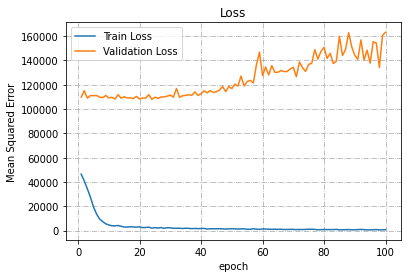

In [10]:
import matplotlib.pyplot as plt

ax = plt.gca()
plt.title('Loss')
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
ax.grid(linestyle='-.')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')

plt.legend()
plt.show()